In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns


import cv2

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('./clean_ds.csv')

In [3]:
df.head()

,role,level,degree,link,job_title,company,company_url,location,salary,job_type,...,kafka,java,excel,scikit-learn,sklearn,r,scala,stata,spss,sas
0,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ab2aea441ea1e...,Business Intelligence Analyst,UCHealth,https://www.indeed.com/cmp/Uchealth-2,"Location\n2500 Rocky Mountain Avenue, Loveland...",31.61 - 47.41,Full-time,...,0,0,0,0,0,0,0,0,0,0
1,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=45359086e0c5b...,Business Research Analyst,Schweitzer Engineering Laboratories,https://www.indeed.com/cmp/Schweitzer-Engineer...,"Location\nPullman, WA\n&nbsp;",58200 - 91200,Full-time,...,0,0,0,0,0,0,0,0,0,0
2,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=bfde32d85c230...,Technical Business Analyst,Fisher Investments,https://www.indeed.com/cmp/Fisher-Investments,"Location\nCamas, WA\n&nbsp;",85000 - 130000,Full-time,...,0,0,1,0,0,0,1,0,0,0
3,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=e0f617350b0ec...,"Business Analyst, Jr",Tista Science and Technology Corporation,https://www.indeed.com/cmp/Tista-Science-and-T...,Location\nRemote\n&nbsp;,38145 - 61625,Full-time,...,0,0,1,0,0,0,0,0,0,0
4,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ff79324cd280b...,BUSINESS SYSTEMS ANALYST,The State of New Hampshire,https://www.indeed.com/cmp/State-of-New-Hampshire,"Location\n7 Hazen Drive, Concord, NH\n&nbsp;",30.72 - 41.76,Full-time,...,0,0,1,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   role                          11290 non-null  object 
 1   level                         11290 non-null  object 
 2   degree                        11290 non-null  object 
 3   link                          11290 non-null  object 
 4   job_title                     11290 non-null  object 
 5   company                       11290 non-null  object 
 6   company_url                   11290 non-null  object 
 7   location                      11290 non-null  object 
 8   salary                        11290 non-null  object 
 9   job_type                      7700 non-null   object 
 10  benefits                      11290 non-null  object 
 11  description                   11289 non-null  object 
 12  cname                         11289 non-null  object 
 13  r

In [5]:
df.head()

,role,level,degree,link,job_title,company,company_url,location,salary,job_type,...,kafka,java,excel,scikit-learn,sklearn,r,scala,stata,spss,sas
0,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ab2aea441ea1e...,Business Intelligence Analyst,UCHealth,https://www.indeed.com/cmp/Uchealth-2,"Location\n2500 Rocky Mountain Avenue, Loveland...",31.61 - 47.41,Full-time,...,0,0,0,0,0,0,0,0,0,0
1,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=45359086e0c5b...,Business Research Analyst,Schweitzer Engineering Laboratories,https://www.indeed.com/cmp/Schweitzer-Engineer...,"Location\nPullman, WA\n&nbsp;",58200 - 91200,Full-time,...,0,0,0,0,0,0,0,0,0,0
2,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=bfde32d85c230...,Technical Business Analyst,Fisher Investments,https://www.indeed.com/cmp/Fisher-Investments,"Location\nCamas, WA\n&nbsp;",85000 - 130000,Full-time,...,0,0,1,0,0,0,1,0,0,0
3,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=e0f617350b0ec...,"Business Analyst, Jr",Tista Science and Technology Corporation,https://www.indeed.com/cmp/Tista-Science-and-T...,Location\nRemote\n&nbsp;,38145 - 61625,Full-time,...,0,0,1,0,0,0,0,0,0,0
4,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ff79324cd280b...,BUSINESS SYSTEMS ANALYST,The State of New Hampshire,https://www.indeed.com/cmp/State-of-New-Hampshire,"Location\n7 Hazen Drive, Concord, NH\n&nbsp;",30.72 - 41.76,Full-time,...,0,0,1,0,0,0,0,0,0,0


In [115]:
all_columns_list = df.columns.to_list()
all_columns_list

['role',
 'level',
 'degree',
 'link',
 'job_title',
 'company',
 'company_url',
 'location',
 'salary',
 'job_type',
 'benefits',
 'description',
 'cname',
 'ratings',
 'review_count',
 'review_link',
 'company_size',
 'company_revenue',
 'company_industry',
 'company_headquarters_clipped',
 'company_headquarters_full',
 'ceo_name',
 'ceo_approve_percentage',
 'company_founded',
 'company_website_url',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'salary_type',
 'min_salary',
 'max_salary',
 'min_revenue',
 'max_revenue',
 'min_max_revenue',
 'python',
 'mysql',
 'postgresql',
 'tensorflow',
 'pytorch',
 'aws',
 'tableau',
 'powerbi',
 'hadoop',
 'kafka',
 'java',
 'excel',
 'scikit-learn',
 'sklearn',
 ' r ',
 'scala',
 'stata',
 'spss',
 'sas']

In [116]:
skills = ['python',
 'mysql',
 'postgresql',
 'tensorflow',
 'pytorch',
 'aws',
 'tableau',
 'powerbi',
 'hadoop',
 'kafka',
 'java',
 'excel',
 'scikit-learn',
 'sklearn',
 ' r ',
 'scala',
 'stata',
 'spss',
 'sas']

In [117]:
df.drop(columns=skills,inplace=True)

In [119]:
df.drop_duplicates(subset='company_url',inplace=True)

In [121]:
df.isnull().sum()

role                               0
level                              0
degree                             0
link                               0
job_title                          0
company                            0
company_url                        0
location                           0
salary                             0
job_type                        1527
benefits                           0
description                        0
cname                              0
ratings                          904
review_count                       0
review_link                        0
company_size                       0
company_revenue                    0
company_industry                1035
company_headquarters_clipped    1302
company_headquarters_full       4321
ceo_name                        2766
ceo_approve_percentage             0
company_founded                 2101
company_website_url             1065
Average_rating_score            2748
Average_rating                  2748
H

In [124]:
all_columns_list

['role',
 'level',
 'degree',
 'link',
 'job_title',
 'company',
 'company_url',
 'location',
 'salary',
 'job_type',
 'benefits',
 'description',
 'cname',
 'ratings',
 'review_count',
 'review_link',
 'company_size',
 'company_revenue',
 'company_industry',
 'company_headquarters_clipped',
 'company_headquarters_full',
 'ceo_name',
 'ceo_approve_percentage',
 'company_founded',
 'company_website_url',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'salary_type',
 'min_salary',
 'max_salary',
 'min_revenue',
 'max_revenue',
 'min_max_revenue',
 'python',
 'mysql',
 'postgresql',
 'tensorflow',
 'pytorch',
 'aws',
 'tableau',
 'powerbi',
 'hadoop',
 'kafka',
 'java',
 'excel',
 'scikit-learn',
 'sklearn',
 ' r ',
 'scala',
 'stata',
 'spss',
 'sas']

In [125]:
cols_to_take = [
 'company_url',
 'ratings',
 'review_count',
  'company_size',
 'company_revenue',
 'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue'
 ]

In [126]:
df.isnull().sum()

role                               0
level                              0
degree                             0
link                               0
job_title                          0
company                            0
company_url                        0
location                           0
salary                             0
job_type                        1527
benefits                           0
description                        0
cname                              0
ratings                          904
review_count                       0
review_link                        0
company_size                       0
company_revenue                    0
company_industry                1035
company_headquarters_clipped    1302
company_headquarters_full       4321
ceo_name                        2766
ceo_approve_percentage             0
company_founded                 2101
company_website_url             1065
Average_rating_score            2748
Average_rating                  2748
H

In [127]:
df['ceo_approve_percentage'].replace(0,np.nan,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18312\84215671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ceo_approve_percentage'].replace(0,np.nan,inplace=True)


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4997 entries, 0 to 11289
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   role                          4997 non-null   object 
 1   level                         4997 non-null   object 
 2   degree                        4997 non-null   object 
 3   link                          4997 non-null   object 
 4   job_title                     4997 non-null   object 
 5   company                       4997 non-null   object 
 6   company_url                   4997 non-null   object 
 7   location                      4997 non-null   object 
 8   salary                        4997 non-null   object 
 9   job_type                      3470 non-null   object 
 10  benefits                      4997 non-null   object 
 11  description                   4997 non-null   object 
 12  cname                         4997 non-null   object 
 13  ratings

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4997 entries, 0 to 11289
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ratings                 4093 non-null   float64
 1   review_count            4997 non-null   float64
 2   company_size            4997 non-null   object 
 3   company_industry        3962 non-null   object 
 4   ceo_approve_percentage  1883 non-null   float64
 5   company_founded         2896 non-null   float64
 6   Average_rating_score    2249 non-null   float64
 7   Average_rating          2249 non-null   object 
 8   Happiness               2143 non-null   float64
 9   Stress-free             2143 non-null   float64
 10  Purpose                 2143 non-null   float64
 11  Satisfaction            2143 non-null   float64
 12  Flexibility             2085 non-null   float64
 13  Achievement             2080 non-null   float64
 14  Learning                2085 non-null   floa

In [108]:
cols_to_take

['company_url',
 'ratings',
 'review_count',
 'company_size',
 'company_revenue',
 'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue']

In [129]:
to_predict_df = df[cols_to_take]

In [130]:
to_predict_df

,company_url,ratings,review_count,company_size,company_revenue,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,...,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue
0,https://www.indeed.com/cmp/Uchealth-2,3.7,1200.0,>10000,Not Mentioned,Healthcare,80.0,2006.0,71.0,Average,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,Not Mentioned
1,https://www.indeed.com/cmp/Schweitzer-Engineer...,3.9,272.0,1001-5000,1B-5B,Manufacturing,NaN,1984.0,74.0,Above average,...,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,1B-5B
2,https://www.indeed.com/cmp/Fisher-Investments,3.5,186.0,1001-5000,Not Mentioned,Investment & Asset Management,67.0,1979.0,65.0,Below average,...,3.0,2.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,Not Mentioned
3,https://www.indeed.com/cmp/Tista-Science-and-T...,3.7,47.0,201-500,100M-500M,Information Technology,82.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100M-500M
4,https://www.indeed.com/cmp/State-of-New-Hampshire,3.8,186.0,5001-10000,Not Mentioned,State & Regional Agencies,NaN,1950.0,67.0,Below average,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,Not Mentioned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262,https://www.indeed.com/cmp/Aultman-Health-Foun...,3.6,360.0,5001-10000,1M-5M,Healthcare,83.0,1984.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1M-5M
11263,https://www.indeed.com/cmp/Harpro-Tech,NaN,0.0,Not Mentioned,Not Mentioned,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Mentioned
11284,https://www.indeed.com/cmp/Imubit,NaN,0.0,Not Mentioned,Not Mentioned,Manufacturing,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Mentioned
11287,https://www.indeed.com/cmp/Heb,4.2,11300.0,>10000,>10B,Grocery Stores,92.0,1905.0,75.0,Above average,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>10B


In [ ]:
to_predict_df

,company_url,ratings,review_count,company_size,company_revenue,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,...,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue
0,https://www.indeed.com/cmp/Uchealth-2,3.7,1200.0,>10000,Not Mentioned,Healthcare,80,2006.0,71.0,Average,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,Not Mentioned
1,https://www.indeed.com/cmp/Schweitzer-Engineer...,3.9,272.0,1001-5000,1B-5B,Manufacturing,0,1984.0,74.0,Above average,...,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,1B-5B
2,https://www.indeed.com/cmp/Fisher-Investments,3.5,186.0,1001-5000,Not Mentioned,Investment & Asset Management,67,1979.0,65.0,Below average,...,3.0,2.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,Not Mentioned
3,https://www.indeed.com/cmp/Tista-Science-and-T...,3.7,47.0,201-500,100M-500M,Information Technology,82,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100M-500M
4,https://www.indeed.com/cmp/State-of-New-Hampshire,3.8,186.0,5001-10000,Not Mentioned,State & Regional Agencies,0,1950.0,67.0,Below average,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,Not Mentioned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,https://www.indeed.com/cmp/Intone-Networks,4.1,18.0,201-500,5M-25M,Information Technology Support Services,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5M-25M
11286,https://www.indeed.com/cmp/Cisco,4.1,6500.0,>10000,>10B,Information Technology,85,1984.0,77.0,High,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,>10B
11287,https://www.indeed.com/cmp/Heb,4.2,11300.0,>10000,>10B,Grocery Stores,92,1905.0,75.0,Above average,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>10B
11288,https://www.indeed.com/cmp/Transamerica,3.5,1600.0,Not Mentioned,Not Mentioned,NaN,0,NaN,68.0,Below average,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,Not Mentioned


In [131]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4997 entries, 0 to 11289
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_url             4997 non-null   object 
 1   ratings                 4093 non-null   float64
 2   review_count            4997 non-null   float64
 3   company_size            4997 non-null   object 
 4   company_revenue         4997 non-null   object 
 5   company_industry        3962 non-null   object 
 6   ceo_approve_percentage  1883 non-null   float64
 7   company_founded         2896 non-null   float64
 8   Average_rating_score    2249 non-null   float64
 9   Average_rating          2249 non-null   object 
 10  Happiness               2143 non-null   float64
 11  Stress-free             2143 non-null   float64
 12  Purpose                 2143 non-null   float64
 13  Satisfaction            2143 non-null   float64
 14  Flexibility             2085 non-null   floa

In [ ]:
to_predict_df

,company_url,ratings,review_count,company_size,company_revenue,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,...,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue
0,https://www.indeed.com/cmp/Uchealth-2,3.7,1200.0,>10000,Not Mentioned,Healthcare,80,2006.0,71.0,Average,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,Not Mentioned
1,https://www.indeed.com/cmp/Schweitzer-Engineer...,3.9,272.0,1001-5000,1B-5B,Manufacturing,0,1984.0,74.0,Above average,...,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,1B-5B
2,https://www.indeed.com/cmp/Fisher-Investments,3.5,186.0,1001-5000,Not Mentioned,Investment & Asset Management,67,1979.0,65.0,Below average,...,3.0,2.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,Not Mentioned
3,https://www.indeed.com/cmp/Tista-Science-and-T...,3.7,47.0,201-500,100M-500M,Information Technology,82,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100M-500M
4,https://www.indeed.com/cmp/State-of-New-Hampshire,3.8,186.0,5001-10000,Not Mentioned,State & Regional Agencies,0,1950.0,67.0,Below average,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,Not Mentioned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,https://www.indeed.com/cmp/Intone-Networks,4.1,18.0,201-500,5M-25M,Information Technology Support Services,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5M-25M
11286,https://www.indeed.com/cmp/Cisco,4.1,6500.0,>10000,>10B,Information Technology,85,1984.0,77.0,High,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,>10B
11287,https://www.indeed.com/cmp/Heb,4.2,11300.0,>10000,>10B,Grocery Stores,92,1905.0,75.0,Above average,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>10B
11288,https://www.indeed.com/cmp/Transamerica,3.5,1600.0,Not Mentioned,Not Mentioned,NaN,0,NaN,68.0,Below average,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,Not Mentioned


In [ ]:
to_predict_df['company_url'].nunique()

4997

In [ ]:
to_predict_df.drop_duplicates(subset='company_url',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9212\2842627874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df.drop_duplicates(subset='company_url',inplace=True)


In [ ]:
to_predict_df.shape

(4997, 26)

In [ ]:
df.iloc[:,1:-1]

,level,degree,link,job_title,company,company_url,location,salary,job_type,benefits,...,Energy,Compensation,Management,Trust,Belonging,salary_type,min_salary,max_salary,min_revenue,max_revenue
0,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ab2aea441ea1e...,Business Intelligence Analyst,UCHealth,https://www.indeed.com/cmp/Uchealth-2,"Location\n2500 Rocky Mountain Avenue, Loveland...",31.61 - 47.41,Full-time,"['403(b) matching', 'Continuing education cred...",...,3.0,3.0,3.0,4.0,3.0,hour,60691.2,91027.2,NaN,NaN
1,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=45359086e0c5b...,Business Research Analyst,Schweitzer Engineering Laboratories,https://www.indeed.com/cmp/Schweitzer-Engineer...,"Location\nPullman, WA\n&nbsp;",58200 - 91200,Full-time,"['401(k)', 'Disability insurance', 'Employee s...",...,4.0,5.0,4.0,4.0,4.0,year,58200.0,91200.0,1B,5B
2,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=bfde32d85c230...,Technical Business Analyst,Fisher Investments,https://www.indeed.com/cmp/Fisher-Investments,"Location\nCamas, WA\n&nbsp;",85000 - 130000,Full-time,"['401(k) matching', 'Adoption assistance', 'Ca...",...,1.0,4.0,3.0,2.0,2.0,year,85000.0,130000.0,NaN,NaN
3,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=e0f617350b0ec...,"Business Analyst, Jr",Tista Science and Technology Corporation,https://www.indeed.com/cmp/Tista-Science-and-T...,Location\nRemote\n&nbsp;,38145 - 61625,Full-time,"['401(k) matching', 'Disability insurance', 'E...",...,NaN,NaN,NaN,NaN,NaN,year,38145.0,61625.0,100M,500M
4,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ff79324cd280b...,BUSINESS SYSTEMS ANALYST,The State of New Hampshire,https://www.indeed.com/cmp/State-of-New-Hampshire,"Location\n7 Hazen Drive, Concord, NH\n&nbsp;",30.72 - 41.76,Full-time,"['457(b)', 'Childcare', 'Flexible schedule', '...",...,2.0,2.0,3.0,2.0,2.0,hour,58982.4,80179.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=6078f1a23fe6f...,Data Architect,Intone Networks,https://www.indeed.com/cmp/Intone-Networks,Location\nArizona\n&nbsp;,No Salary,NaN,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5M,25M
11286,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=09f289b51743a...,Software Engineer,Cisco Systems,https://www.indeed.com/cmp/Cisco,"Location\nSan Jose, CA\n&nbsp;",No Salary,Full-time,"['401(k)', '401(k) matching', 'Dental insuranc...",...,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,10B,10B
11287,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=9b5fba4325f35...,"Engineering Manager, MLOps- San Antonio, Austi...",H-E-B,https://www.indeed.com/cmp/Heb,"Location\n3890 W Northwest Hwy Ste 300, Dallas...",No Salary,Full-time,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10B,10B
11288,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=086f4cc74e3a8...,Lead Cloud Engineer (Work from Home),Transamerica,https://www.indeed.com/cmp/Transamerica,Location\nRemote\n&nbsp;,120000 - 136000,Full-time,"['401(k) matching', 'Adoption assistance', 'De...",...,2.0,3.0,3.0,3.0,3.0,year,120000.0,136000.0,NaN,NaN


In [132]:
to_predict_df.isnull().sum()

company_url                  0
ratings                    904
review_count                 0
company_size                 0
company_revenue              0
company_industry          1035
ceo_approve_percentage    3114
company_founded           2101
Average_rating_score      2748
Average_rating            2748
Happiness                 2854
Stress-free               2854
Purpose                   2854
Satisfaction              2854
Flexibility               2912
Achievement               2917
Learning                  2912
Inclusion                 2912
Support                   2911
Appreciation              2911
Energy                    2917
Compensation              2911
Management                2912
Trust                     2911
Belonging                 2911
min_max_revenue              0
dtype: int64

In [ ]:
all_columns_list

<Axes: >

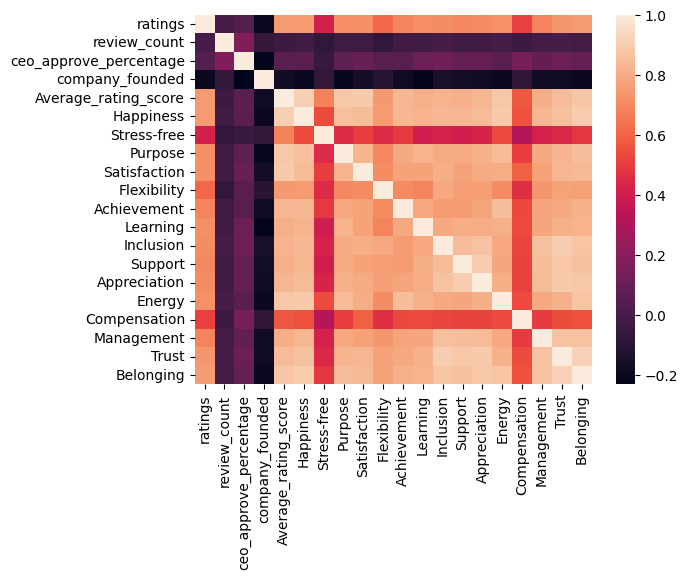

In [103]:
sns.heatmap(df.select_dtypes('number').corr())

In [ ]:
to_predict_df['ratings'].describe()

count    4093.000000
mean        3.619717
std         0.608340
min         1.000000
25%         3.300000
50%         3.700000
75%         4.000000
max         5.000000
Name: ratings, dtype: float64

In [104]:
df.isnull().sum()

ratings                    904
review_count                 0
company_size                 0
company_industry          1035
ceo_approve_percentage       0
company_founded           2101
Average_rating_score      2748
Average_rating            2748
Happiness                 2854
Stress-free               2854
Purpose                   2854
Satisfaction              2854
Flexibility               2912
Achievement               2917
Learning                  2912
Inclusion                 2912
Support                   2911
Appreciation              2911
Energy                    2917
Compensation              2911
Management                2912
Trust                     2911
Belonging                 2911
min_max_revenue              0
dtype: int64

In [133]:
to_predict_df.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18312\94811522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df.dropna(inplace=True)


In [134]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 11181
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_url             1238 non-null   object 
 1   ratings                 1238 non-null   float64
 2   review_count            1238 non-null   float64
 3   company_size            1238 non-null   object 
 4   company_revenue         1238 non-null   object 
 5   company_industry        1238 non-null   object 
 6   ceo_approve_percentage  1238 non-null   float64
 7   company_founded         1238 non-null   float64
 8   Average_rating_score    1238 non-null   float64
 9   Average_rating          1238 non-null   object 
 10  Happiness               1238 non-null   float64
 11  Stress-free             1238 non-null   float64
 12  Purpose                 1238 non-null   float64
 13  Satisfaction            1238 non-null   float64
 14  Flexibility             1238 non-null   floa

In [135]:
to_predict_df['company_url'].nunique()

1238

In [136]:
to_predict_df['ratings'].describe()

count    1238.000000
mean        3.588449
std         0.375960
min         1.700000
25%         3.400000
50%         3.600000
75%         3.900000
max         4.500000
Name: ratings, dtype: float64

<Axes: >

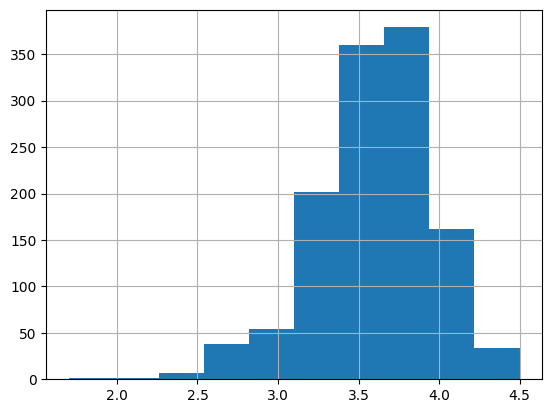

In [137]:
to_predict_df['ratings'].hist()

In [138]:
low_threshold = 3.7


def categorize_rating(rating):
    if rating < low_threshold:
        return 0
    else:
        return 1


to_predict_df['rating_class'] = to_predict_df['ratings'].apply(categorize_rating)

C:\Users\user\AppData\Local\Temp\ipykernel_18312\2724556180.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['rating_class'] = to_predict_df['ratings'].apply(categorize_rating)


In [139]:
to_predict_df["rating_class"].value_counts()

rating_class
0    663
1    575
Name: count, dtype: int64

In [140]:
to_predict_df.columns.to_list()

['company_url',
 'ratings',
 'review_count',
 'company_size',
 'company_revenue',
 'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue',
 'rating_class']

In [141]:
to_predict_df.drop(columns=['ratings','company_url'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18312\3719093848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df.drop(columns=['ratings','company_url'],inplace=True)


In [142]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 11181
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_count            1238 non-null   float64
 1   company_size            1238 non-null   object 
 2   company_revenue         1238 non-null   object 
 3   company_industry        1238 non-null   object 
 4   ceo_approve_percentage  1238 non-null   float64
 5   company_founded         1238 non-null   float64
 6   Average_rating_score    1238 non-null   float64
 7   Average_rating          1238 non-null   object 
 8   Happiness               1238 non-null   float64
 9   Stress-free             1238 non-null   float64
 10  Purpose                 1238 non-null   float64
 11  Satisfaction            1238 non-null   float64
 12  Flexibility             1238 non-null   float64
 13  Achievement             1238 non-null   float64
 14  Learning                1238 non-null   floa

In [143]:
to_predict_df.columns.to_list()

['review_count',
 'company_size',
 'company_revenue',
 'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue',
 'rating_class']

In [ ]:
feat_list = ['review_count',
 'company_size',
  'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue']

In [ ]:
cols_object = to_predict_df.select_dtypes('object').columns.to_list()
for col in cols_object:
    to_predict_df[col] = to_predict_df[col].astype('category')

C:\Users\user\AppData\Local\Temp\ipykernel_22944\2366768264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df[col] = to_predict_df[col].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_22944\2366768264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df[col] = to_predict_df[col].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_22944\2366768264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [ ]:
cols_object

['company_size',
 'company_revenue',
 'company_industry',
 'Average_rating',
 'min_max_revenue']

In [144]:
label_encoder = LabelEncoder()
to_predict_df['company_size'] = label_encoder.fit_transform(to_predict_df['company_size'])


C:\Users\user\AppData\Local\Temp\ipykernel_18312\2544420208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['company_size'] = label_encoder.fit_transform(to_predict_df['company_size'])


In [145]:

to_predict_df['company_industry'] = label_encoder.fit_transform(to_predict_df['company_industry'])
to_predict_df['Average_rating'] = label_encoder.fit_transform(to_predict_df['Average_rating'])
to_predict_df['min_max_revenue'] = label_encoder.fit_transform(to_predict_df['min_max_revenue'])

C:\Users\user\AppData\Local\Temp\ipykernel_18312\1864655933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['company_industry'] = label_encoder.fit_transform(to_predict_df['company_industry'])
C:\Users\user\AppData\Local\Temp\ipykernel_18312\1864655933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['Average_rating'] = label_encoder.fit_transform(to_predict_df['Average_rating'])
C:\Users\user\AppData\Local\Temp\ipykernel_18312\1864655933.py:3: SettingWithCopyWarning: 
A v

In [146]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 11181
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_count            1238 non-null   float64
 1   company_size            1238 non-null   int32  
 2   company_revenue         1238 non-null   object 
 3   company_industry        1238 non-null   int32  
 4   ceo_approve_percentage  1238 non-null   float64
 5   company_founded         1238 non-null   float64
 6   Average_rating_score    1238 non-null   float64
 7   Average_rating          1238 non-null   int32  
 8   Happiness               1238 non-null   float64
 9   Stress-free             1238 non-null   float64
 10  Purpose                 1238 non-null   float64
 11  Satisfaction            1238 non-null   float64
 12  Flexibility             1238 non-null   float64
 13  Achievement             1238 non-null   float64
 14  Learning                1238 non-null   floa

In [147]:
feat_list

['review_count',
 'company_size',
 'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue']

In [148]:
X = to_predict_df[feat_list]
y = to_predict_df['rating_class']

In [149]:
y.value_counts()

rating_class
0    663
1    575
Name: count, dtype: int64

In [150]:
X

,review_count,company_size,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,Happiness,Stress-free,Purpose,...,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue
0,1200.0,6,47,80.0,2006.0,71.0,1,3.0,2.0,4.0,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,9
2,186.0,0,59,67.0,1979.0,65.0,2,1.0,2.0,2.0,...,3.0,2.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,9
5,42.0,0,8,69.0,1954.0,68.0,2,2.0,1.0,3.0,...,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,0
6,74.0,4,93,66.0,2008.0,69.0,1,2.0,3.0,3.0,...,3.0,4.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,9
8,822.0,6,20,91.0,1982.0,78.0,3,5.0,3.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,10200.0,6,55,72.0,1931.0,68.0,2,3.0,1.0,3.0,...,4.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,8
11100,629.0,3,23,82.0,1919.0,74.0,0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,8
11125,119.0,4,96,73.0,1904.0,66.0,2,2.0,1.0,3.0,...,2.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,9
11135,252.0,0,23,74.0,1968.0,74.0,0,4.0,4.0,4.0,...,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,1


In [151]:
len(X),len(y)

(1238, 1238)

In [152]:
to_predict_df['company_revenue']

0        Not Mentioned
2        Not Mentioned
5            100M-500M
6        Not Mentioned
8               5B-10B
             ...      
11094             >10B
11100             >10B
11125    Not Mentioned
11135            1B-5B
11181          500M-1B
Name: company_revenue, Length: 1238, dtype: object

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       133
           1       0.80      0.77      0.79       115

    accuracy                           0.81       248
   macro avg       0.81      0.80      0.80       248
weighted avg       0.81      0.81      0.81       248

ROC_AUC_SCORE is 0.8042497548218372


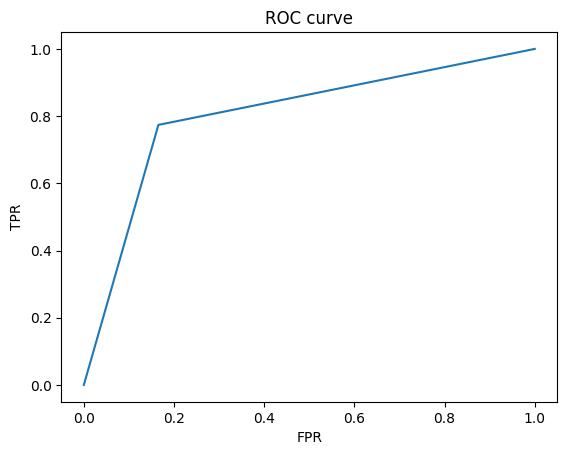

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.68      0.96      0.80       133
           1       0.92      0.49      0.64       115

    accuracy                           0.74       248
   macro avg       0.80      0.72      0.72       248
weighted avg       0.79      0.74      0.72       248

ROC_AUC_SCORE is 0.7246812683883622


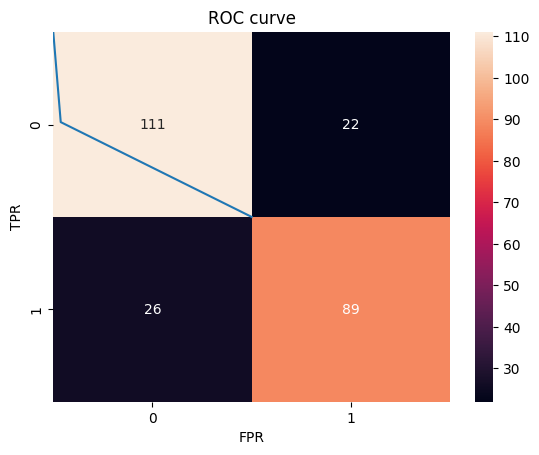

Classification Report: Decision Trees
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       133
           1       0.76      0.82      0.79       115

    accuracy                           0.79       248
   macro avg       0.79      0.80      0.79       248
weighted avg       0.80      0.79      0.79       248

ROC_AUC_SCORE is 0.795913697286695


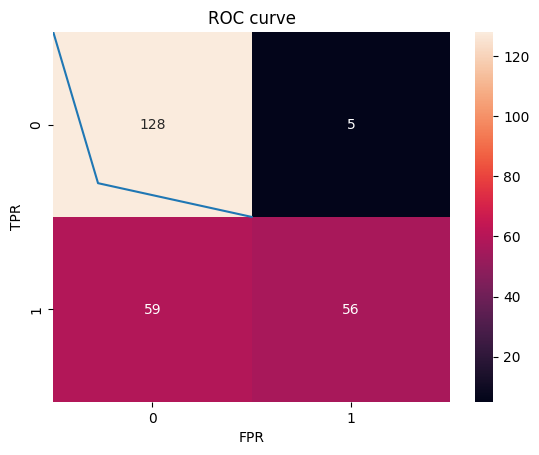

Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       133
           1       0.86      0.81      0.83       115

    accuracy                           0.85       248
   macro avg       0.85      0.85      0.85       248
weighted avg       0.85      0.85      0.85       248

ROC_AUC_SCORE is 0.8479568486433475


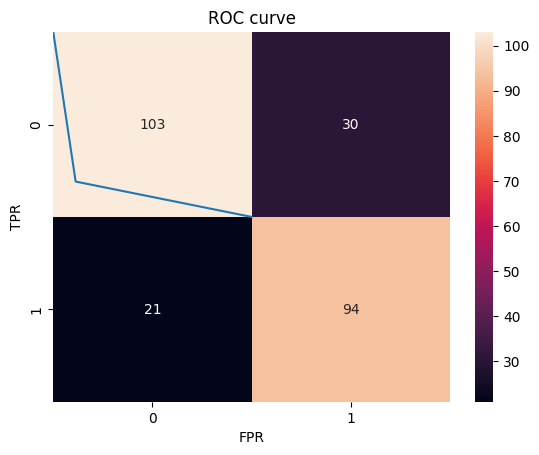

Classification Report: Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       133
           1       0.78      0.83      0.80       115

    accuracy                           0.81       248
   macro avg       0.81      0.81      0.81       248
weighted avg       0.81      0.81      0.81       248

ROC_AUC_SCORE is 0.8115397188623734


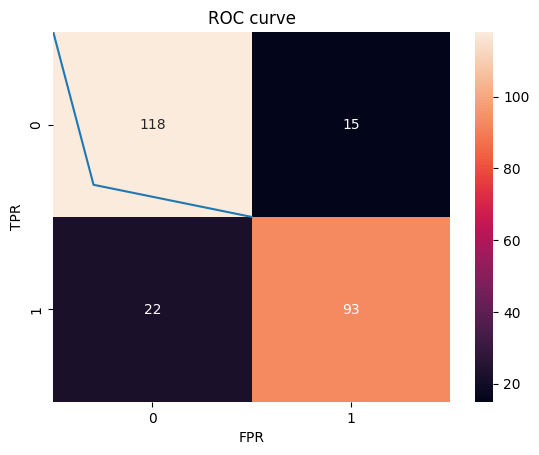

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       133
           1       0.84      0.82      0.83       115

    accuracy                           0.84       248
   macro avg       0.84      0.84      0.84       248
weighted avg       0.84      0.84      0.84       248

ROC_AUC_SCORE is 0.8410264792415824


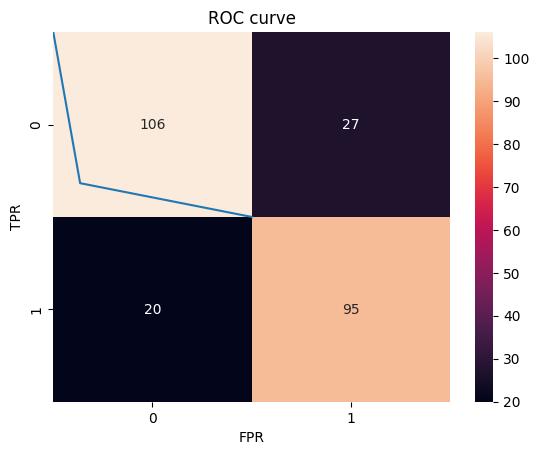

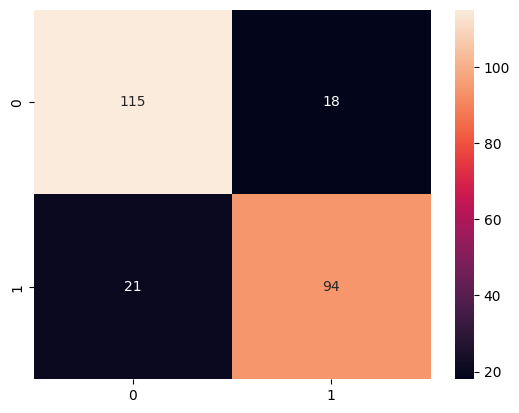

In [155]:

models = {}

models['Logistic Regression'] = LogisticRegression()
models['Support Vector Machines'] =  LinearSVC()
models['Decision Trees'] =  DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()
models['XGBoost'] = XGBClassifier()


accuracy, precision, recall = {}, {}, {}

for key in models.keys():


    models[key].fit(X_train, y_train)


    predictions = models[key].predict(X_test)

  
    accuracy[key] = accuracy_score(predictions, y_test)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)  
    Y_predict = models[key].predict(X_test)
    auc = roc_auc_score(y_test, Y_predict)

    print('Classification Report:',key)
    print(classification_report(y_test,predictions))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, predictions))



    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    sns.heatmap(confusion_matrix(y_test,predictions),fmt='',annot=True)

In [156]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
   
    model.fit(X_train, y_train)

  
    y_pred = model.predict(X_test)


    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

  
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

AdaBoost


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       133
           1       0.82      0.82      0.82       115

    accuracy                           0.83       248
   macro avg       0.83      0.83      0.83       248
weighted avg       0.83      0.83      0.83       248



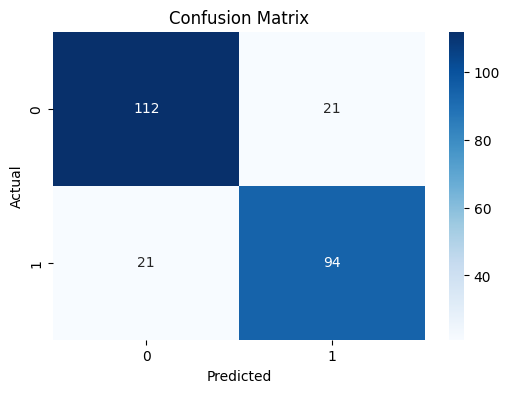

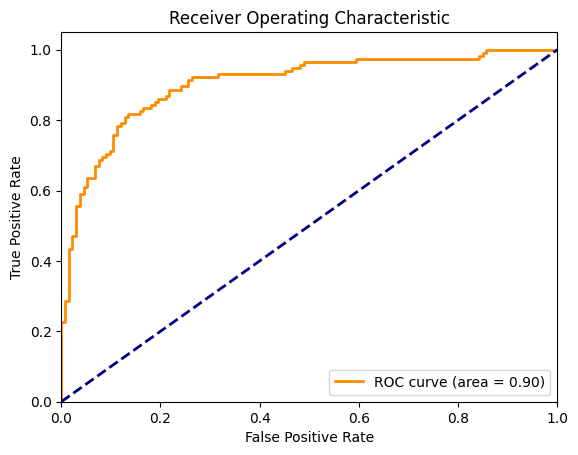

Gradient Boosting
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       133
           1       0.86      0.85      0.86       115

    accuracy                           0.87       248
   macro avg       0.87      0.87      0.87       248
weighted avg       0.87      0.87      0.87       248



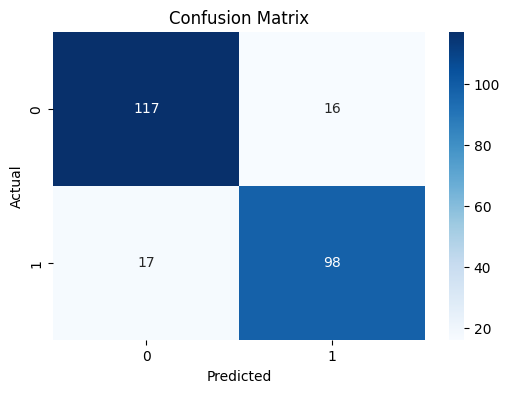

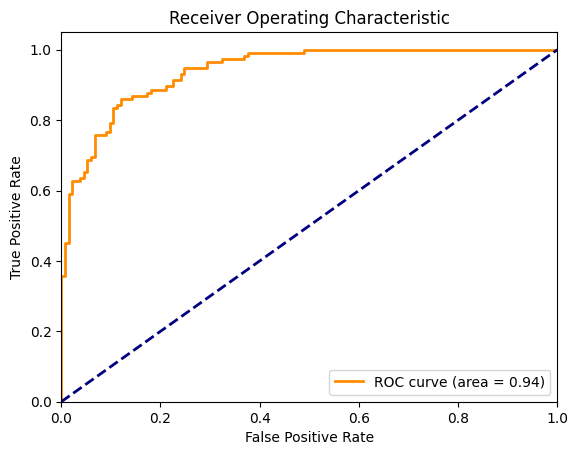

XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       133
           1       0.84      0.82      0.83       115

    accuracy                           0.84       248
   macro avg       0.84      0.84      0.84       248
weighted avg       0.84      0.84      0.84       248



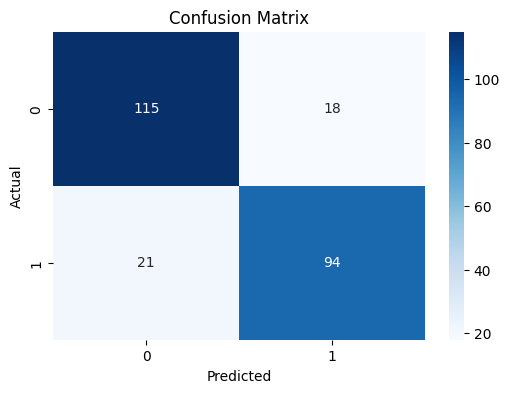

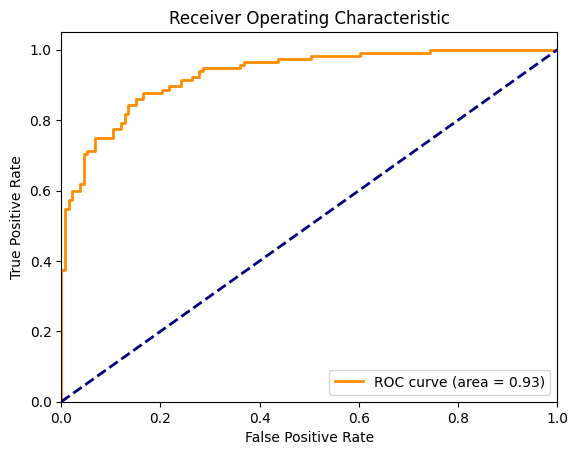

LightGBM
[LightGBM] [Info] Number of positive: 460, number of negative: 530
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 990, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464646 -> initscore=-0.141651
[LightGBM] [Info] Start training from score -0.141651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       133
           1       0.84      0.80      0.82       115

    accuracy                           0.83       248
   macro avg       0.83      0.83      0.83       248
weighted avg       0.83      0.83      0.83       248



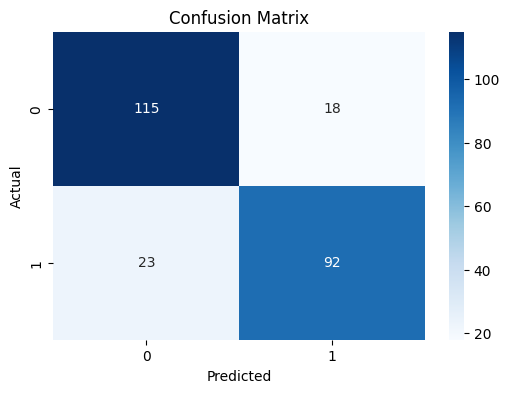

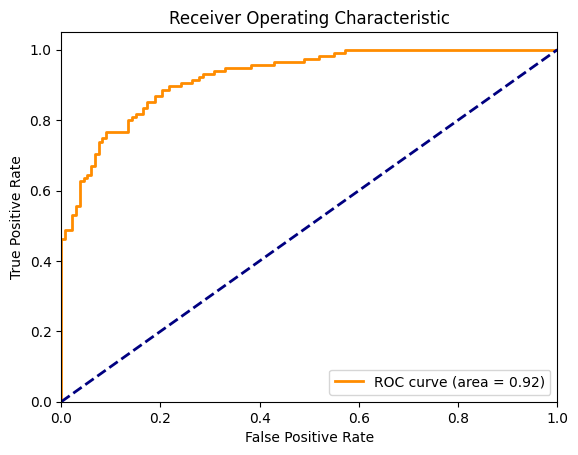

CatBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       133
           1       0.87      0.84      0.85       115

    accuracy                           0.87       248
   macro avg       0.87      0.87      0.87       248
weighted avg       0.87      0.87      0.87       248



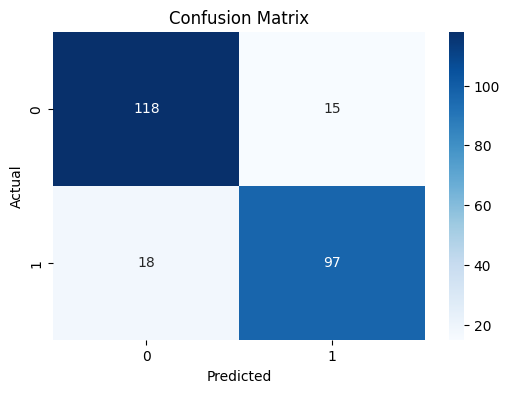

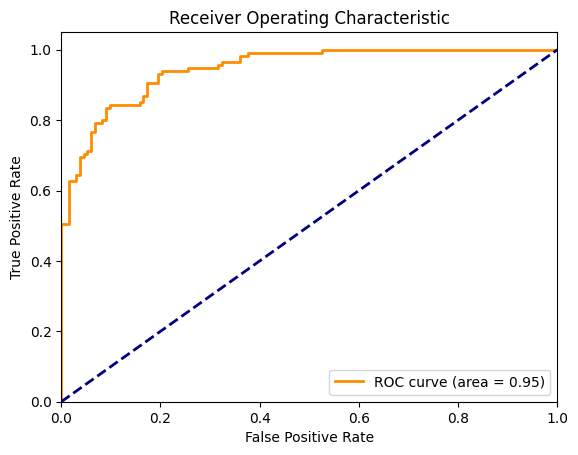

In [157]:

ada_model = AdaBoostClassifier(n_estimators=100)
print("AdaBoost")
evaluate_model(ada_model, X_train, y_train, X_test, y_test)

gb_model = GradientBoostingClassifier(n_estimators=100)
print("Gradient Boosting")
evaluate_model(gb_model, X_train, y_train, X_test, y_test)


xgb_model = XGBClassifier(n_estimators=100)
print("XGBoost")
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)


lgb_model = LGBMClassifier(n_estimators=100)
print("LightGBM")
evaluate_model(lgb_model, X_train, y_train, X_test, y_test)


catboost_model = CatBoostClassifier(iterations=100, verbose=0)
print("CatBoost")
evaluate_model(catboost_model, X_train, y_train, X_test, y_test)

In [160]:
gb_model.feature_importances_

array([0.08061792, 0.00865761, 0.02773976, 0.24163568, 0.03426947,
       0.0199186 , 0.00088966, 0.04434971, 0.00119362, 0.00912919,
       0.00338151, 0.00226078, 0.01103643, 0.0830305 , 0.00396026,
       0.00085916, 0.05988121, 0.00982244, 0.02746033, 0.0065167 ,
       0.31773845, 0.00267817, 0.00297283])

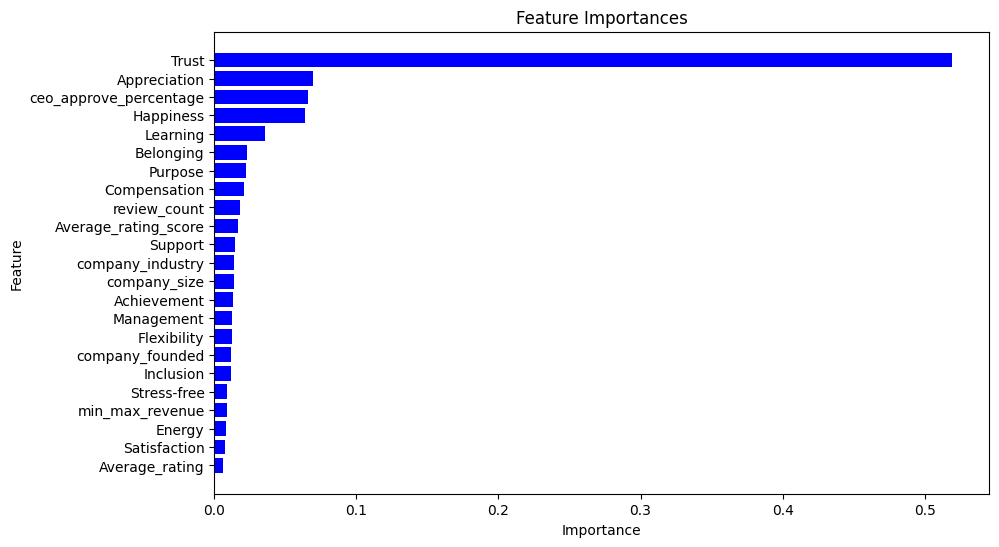

In [163]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier



feature_importances = xgb_model.feature_importances_

feature_names = X_train.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='b')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [165]:
from sklearn.model_selection import GridSearchCV

In [169]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}


gb_model_hp = GradientBoostingClassifier()


grid_search = GridSearchCV(estimator=gb_model_hp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [170]:
grid_search.best_estimator_

GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=10,
                           n_estimators=300, subsample=0.8)

In [171]:
grid_search.best_score_

0.8747474747474747

In [180]:
gb_best_est  = GradientBoostingClassifier()

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       133
           1       0.86      0.85      0.86       115

    accuracy                           0.87       248
   macro avg       0.87      0.87      0.87       248
weighted avg       0.87      0.87      0.87       248



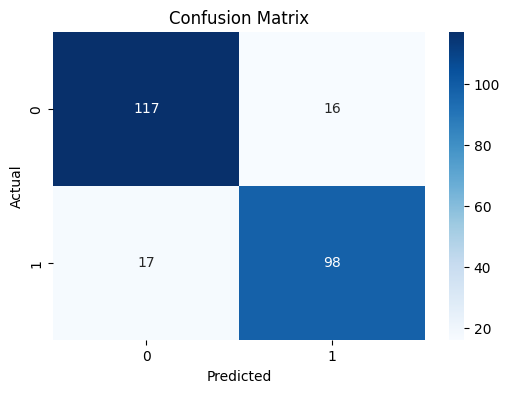

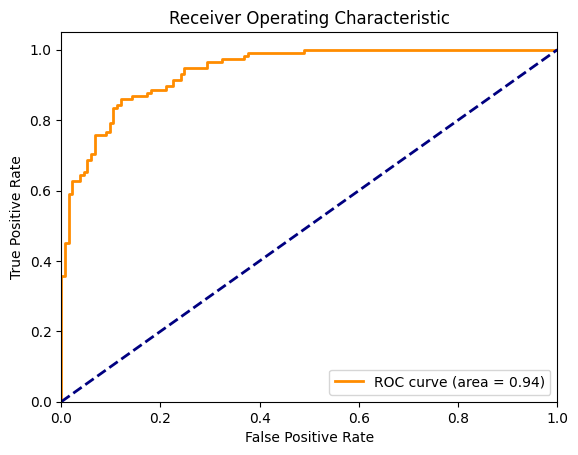

In [181]:
evaluate_model(gb_best_est, X_train, y_train, X_test, y_test)


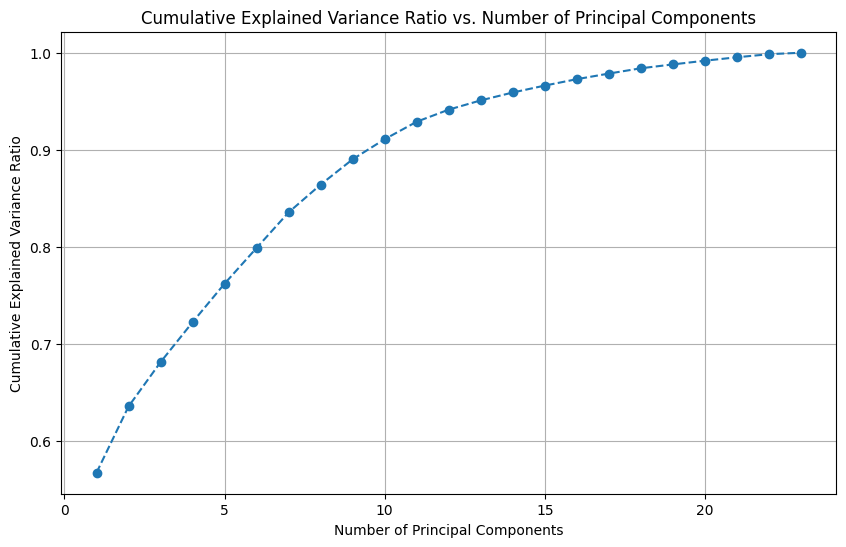

In [183]:



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()


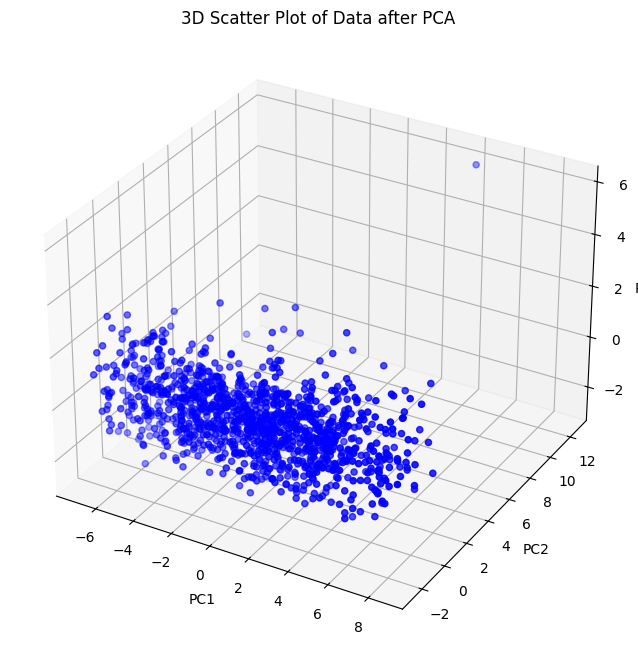

In [184]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




scaler = StandardScaler()
X_scaled = scaler.fit_transform()


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='b', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Data after PCA')

plt.show()
